### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [18]:
data = pd.read_csv('data/coupons.csv')

In [19]:
data.head(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
97,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
98,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [20]:
#Check for Null Values
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3. Decide what to do about your missing data -- drop, replace, other...

In [21]:
#Replace Nulls with 0
data["CarryAway"].fillna("0", inplace = True)

4. What proportion of the total observations chose to accept the coupon? 



In [289]:
#Identify how many people accepted coupons
accepted=data[data["Y"] == 1]["Y"].count()
total=data["Y"].count()
acceptance_rate=accepted/total*100
print("Acceptance Rate" , acceptance_rate)

Acceptance Rate 56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:xlabel='coupon', ylabel='coupon_count'>

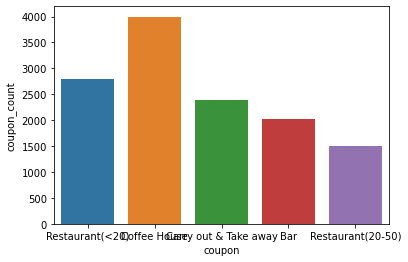

In [72]:
#Group by coupon and aggregate by coupon type
data["coupon_count"] = data.groupby("coupon")["coupon"].transform('count')
#Use Barplot with coupon and coupon_count
sns.barplot(data=data,x="coupon" , y="coupon_count")


6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

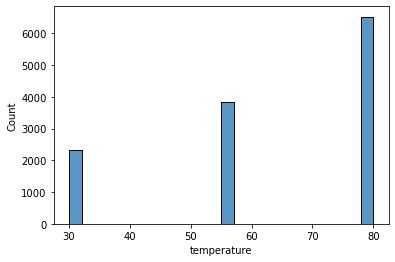

In [75]:
#Histogram for temperature
sns.histplot(data["temperature"])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [239]:
#Create a dataframe where coupon type is Bar
df_bar_coupons=data.query('coupon == "Bar"')



2. What proportion of bar coupons were accepted?


In [290]:
#Count number of bar coupons that were accepted
accepted_coupon_count=df_bar_coupons.query('Y == 1')["coupon"].count()
#Get Total Coupon Count
total_coupon_count=df_bar_coupons["coupon"].count()
#Acceptance_rate
acceptance_rate = accepted_coupon_count / total_coupon_count * 100
print("Acceptance Rate is" ,acceptance_rate)



Acceptance Rate is 41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [294]:
df_bar_coupons.query('Y == 1').groupby(['Bar'])["Bar"].count()

#Identify distincy categories of Bar goers
df_bar_coupons["Bar"].unique()

#Calculate acceptance rate for folks that went to bar 3 times or lesser
acceptance_rate_coupons_lt_3 = df_bar_coupons.query("Y== 1 and Bar in ['1~3', 'less1', 'never']")["coupon"].count() \
/ total_coupon_count *100
print("Acceptance Rate for Bar goers less than 3 times", acceptance_rate_coupons_lt_3)

#Calculate acceptance rate for folks that went to bar greater than 3 times
acceptance_rate_coupons_gt_3 = df_bar_coupons.query("Y== 1 and Bar in ['4~8', 'gt8']")["coupon"].count() \
/ total_coupon_count *100
print("Acceptance Rate for Bar goers greater than 3 times",acceptance_rate_coupons_gt_3)


Acceptance Rate for Bar goers less than 3 times 33.019335647000496
Acceptance Rate for Bar goers greater than 3 times 7.585523054040655


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [297]:
#Replace 50 plus with 51, below 21 with 20 for allowing numeric comparison
df_bar_coupons["age"]=df_bar_coupons["age"].replace('50plus',51)
df_bar_coupons["age"]=df_bar_coupons["age"].replace('below21',20)

#Cast age to int
df_bar_coupons["age"]=df_bar_coupons["age"].astype(int)

#Calculate acceptance rate for age greater than 25 and go more than once
acceptance_rate_lt_1_age_gt_25= df_bar_coupons.query\
("Y== 1 and Bar in ['1~3','4~8', 'gt8' ] and age > 25" )["coupon"].count() / total_coupon_count *100
print("Acceptance Rate for more than 1 and age greater than 25",acceptance_rate_lt_1_age_gt_25)

#Calculate acceptance rate for all others
acceptance_rate_age_rest=df_bar_coupons.query("Y== 1 and Bar in [ '1~3','less1', 'never','4~8', 'gt8'] and age <= 25" )["coupon"].count() / total_coupon_count *100
print("Acceptance Rate for all others",acceptance_rate_age_rest)

#Conclusion
print("Acceptance Rate for those with age over 25 is slightly greater than others")


Acceptance Rate for more than 1 and age greater than 25 14.476945959345564
Acceptance Rate for all others 12.245909766980665
Acceptance Rate for those with age over 25 is slightly greater than others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [311]:
#Get the distinct types of passengers
df_bar_coupons["passanger"].unique()

#Get a list of all columns
df_bar_coupons.columns

#Get the distinct type of occupations
df_bar_coupons["occupation"].unique()

#Calculate Acceptance rate for bar more than once and passengers that were not kids and occupation not in Farming,Fishery
acceptance_rt_gt_1_w_kid_occup=df_bar_coupons.query("Y== 1 and Bar in (['1~3','4~8','gt8']) \
and passanger not in ['Kids(s)'] and occupation not in ['Farming Fishing \& Forestry']")["coupon"].count()/total_coupon_count *100
print("Acceptance Rate for drivers bar > 1, no kids and occupation not in F,F,F",acceptance_rt_gt_1_w_kid_occup)

acceptance_rt_rest=df_bar_coupons.query\
("Y== 1 and passanger in ['Kids(s)'] and occupation in ['Farming Fishing \& Forestry'] " )["coupon"].count()/total_coupon_count *100
print ("Acceptance Rate for Rest", acceptance_rt_rest)

print("Drivers with kids and who had occupation in Farming  Fishing & Forestry had a 0% acceptance rate for Bar Coupons")



Acceptance Rate for drivers bar > 1, no kids and occupation not in F,F,F 20.32721864154685
Acceptance Rate for Rest 0.0
Drivers with kids and who had occupation in Farming  Fishing & Forestry had a 0% acceptance rate for Bar Coupons


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [331]:
#Examine unique values for Marital Status
df_bar_coupons["maritalStatus"].unique()

#Calculate acceptance rate for group 1 (ie) bar frequency gt1, no kids as passenger and not a widow
acceptance_rt_bar_gt_1_nokid_notwidow=df_bar_coupons.query("Y== 1 and Bar in (['1~3','4~8','gt8']) \
and passanger not in ['Kids(s)'] and maritalStatus not in ['Widowed']")["coupon"].count()/total_coupon_count *100

print("Accpetance Rate for bar visit gt 1, no kids, not widowed", acceptance_rt_bar_gt_1_nokid_notwidow)

#Calculate acceptance for group 2 (ie) bar frequency gt 1 and age under 30
acceptance_rt_bar_gt_1_age_lt_30 =df_bar_coupons.query("Y== 1 and Bar in (['1~3','4~8','gt8']) \
and age < 30 ")["coupon"].count()/total_coupon_count *100
print("Accpetance Rate for bar visit gt 1, age less than 30",acceptance_rt_bar_gt_1_age_lt_30 )




#Examine unique values for Restaurants that cost less than 20
df_bar_coupons["RestaurantLessThan20"].unique()

#Examine unique values for Income
df_bar_coupons["income"].unique()

#Calculate acceptance for group 3 (ie) restaurant frequency gt 4 and income < 50K
#'$37500 - $49999'
'4~8'
'gt8'

acceptance_rate_rstant_gt_4_income_lt_50K = df_bar_coupons.query("Y== 1 and RestaurantLessThan20 in (['4~8','gt8']) \
and income in ['$37500 - $49999'] ")["coupon"].count()/total_coupon_count *100

print("Acceptance rate for cheap restaurants with income less than 50K",acceptance_rate_rstant_gt_4_income_lt_50K )

Accpetance Rate for bar visit gt 1, no kids, not widowed 20.32721864154685
Accpetance Rate for bar visit gt 1, age less than 30 12.345066931085771
Acceptance rate for cheap restaurants with income less than 50K 2.379771938522558


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [335]:
print("Acceptance rate for Bar goers was the highest when they had no kid passengers as compared to those that were age less than 30.Also acceptance rate for cheap restaurants was the lowest")

Acceptance rate for Bar goers was the highest when they had no kid passengers as compared to those that were age less than 30.Also acceptance rate for cheap restaurants was the lowest


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  